In [75]:
import matplotlib.pyplot as plt
import re
from operator import itemgetter 

In [76]:
# lr, hidden_dim, depth, params, dropout1, droput2, loss
data = None
with open("analytics.txt", "r") as file:
    data = file.readlines()

In [77]:
for line in data:
    print(re.findall(r"[-+]?\d*\.\d+|\d+", line))

['0.0003', '10', '2', '117570', '1', '0.1', '2', '0.1', '0.0536032744741254']
['0.0003', '10', '3', '102790', '1', '0.1', '2', '0.1', '0.046778395210755226']
['0.00008', '10', '4', '89610', '1', '0.1', '2', '0.1', '0.04952988966713386']
['0.0003', '10', '5', '78030', '1', '0.1', '2', '0.1', '0.03875746892290205']
['0.0003', '15', '2', '264100', '1', '0.1', '2', '0.1', '0.04626810921149264']
['0.0003', '15', '3', '230830', '1', '0.1', '2', '0.1', '0.03925085568680108']
['0.0003', '15', '4', '201160', '1', '0.1', '2', '0.1', '0.03755564105859011']
['0.00008', '15', '5', '175090', '1', '0.1', '2', '0.1', '0.039489930016487505']
['0.0003', '20', '2', '469130', '1', '0.1', '2', '0.1', '0.042288553581234886']
['0.0003', '20', '3', '409970', '1', '0.1', '2', '0.1', '0.031965097443540924']
['0.0003', '20', '4', '357210', '1', '0.1', '2', '0.1', '0.03759824177390787']
['0.0003', '20', '5', '310850', '1', '0.1', '2', '0.1', '0.03077659726772364']
['0.00008', '30', '2', '1054690', '1', '0.1', '2'

In [78]:
run = list(map(list, [itemgetter(1, 2, 3, -1)(re.findall(r"[-+]?\d*\.\d+|\d+", line)) for line in data]))
for i in range(len(run)):
    for j in range(len(run[0])):
        if run[i][j].isdigit():
            run[i][j] = int(run[i][j])
        else:
            run[i][j] = float(run[i][j])

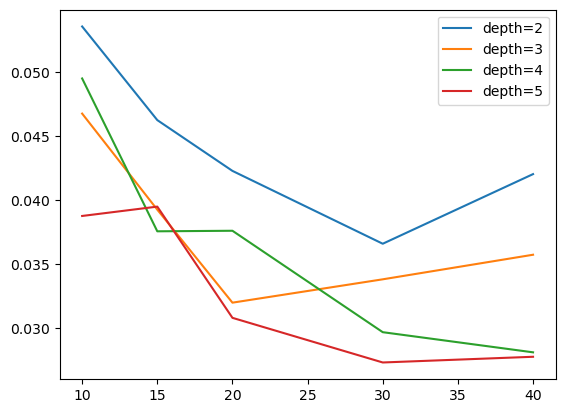

In [79]:
# See how loss changes with width for each depth
for i in range(2, 6):
    same_depth = list(filter(lambda x: x[1] == i, run))
    plt.plot([row[0] for row in same_depth], [row[-1] for row in same_depth], label=f"depth={i}")
plt.legend()
plt.show()

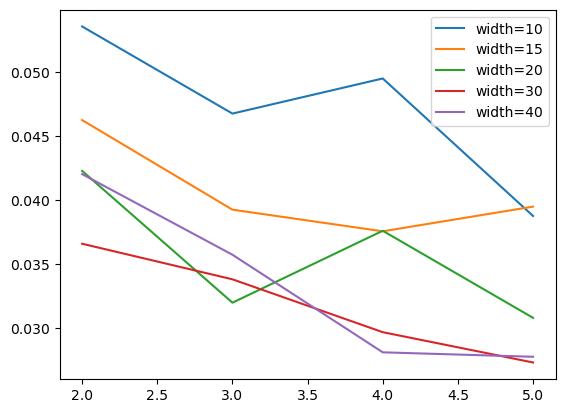

In [80]:
# See how loss changes with depth for each width
for i in [10, 15, 20, 30, 40]:
    same_width = list(filter(lambda x: x[0] == i, run))
    plt.plot([row[1] for row in same_width], [row[-1] for row in same_width], label=f"width={i}")
plt.legend()
plt.show()

In [81]:
# See how loss changes with the number of parameters
second_array = [sublist[2] for sublist in run]
third_array = [sublist[3] for sublist in run]
sorted_indexes = sorted(range(len(second_array)), key=lambda i: second_array[i])
second_array_sorted = [second_array[i] for i in sorted_indexes]
third_array_sorted = [third_array[i] for i in sorted_indexes]

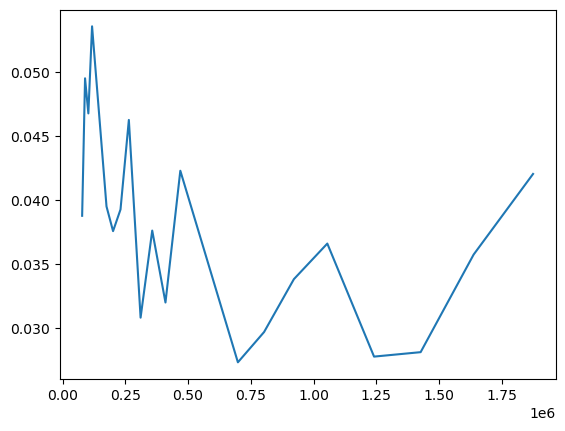

In [82]:
plt.plot(second_array_sorted, third_array_sorted)

In [83]:
# Sorted by loss
sorted(run, key=lambda i: i[3])

[[30, 5, 698470, 0.027278735914987105],
 [40, 5, 1240890, 0.027725637844703634],
 [40, 4, 1426410, 0.028074165000558933],
 [30, 4, 802810, 0.029652165857621596],
 [20, 5, 310850, 0.03077659726772364],
 [20, 3, 409970, 0.031965097443540924],
 [30, 3, 921550, 0.03379413265937243],
 [40, 3, 1637530, 0.03571994206371076],
 [30, 2, 1054690, 0.03658165191538251],
 [15, 4, 201160, 0.03755564105859011],
 [20, 4, 357210, 0.03759824177390787],
 [10, 5, 78030, 0.03875746892290205],
 [15, 3, 230830, 0.03925085568680108],
 [15, 5, 175090, 0.039489930016487505],
 [40, 2, 1874250, 0.04203684613337387],
 [20, 2, 469130, 0.042288553581234886],
 [15, 2, 264100, 0.04626810921149264],
 [10, 3, 102790, 0.046778395210755226],
 [10, 4, 89610, 0.04952988966713386],
 [10, 2, 117570, 0.0536032744741254]]

In [84]:
# Sorted by parameters
sorted(run, key=lambda i: i[2])

[[10, 5, 78030, 0.03875746892290205],
 [10, 4, 89610, 0.04952988966713386],
 [10, 3, 102790, 0.046778395210755226],
 [10, 2, 117570, 0.0536032744741254],
 [15, 5, 175090, 0.039489930016487505],
 [15, 4, 201160, 0.03755564105859011],
 [15, 3, 230830, 0.03925085568680108],
 [15, 2, 264100, 0.04626810921149264],
 [20, 5, 310850, 0.03077659726772364],
 [20, 4, 357210, 0.03759824177390787],
 [20, 3, 409970, 0.031965097443540924],
 [20, 2, 469130, 0.042288553581234886],
 [30, 5, 698470, 0.027278735914987105],
 [30, 4, 802810, 0.029652165857621596],
 [30, 3, 921550, 0.03379413265937243],
 [30, 2, 1054690, 0.03658165191538251],
 [40, 5, 1240890, 0.027725637844703634],
 [40, 4, 1426410, 0.028074165000558933],
 [40, 3, 1637530, 0.03571994206371076],
 [40, 2, 1874250, 0.04203684613337387]]

In [85]:
import numpy as np
run = np.asarray(run)

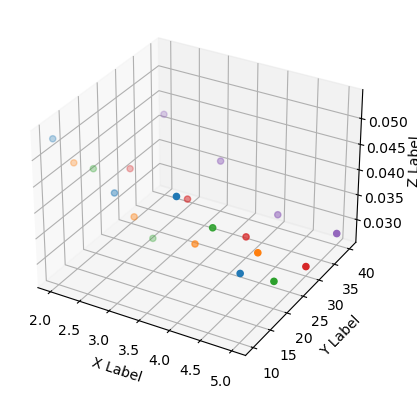

In [86]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

run =  run.reshape(5, 4, 4)
for d in run:
    ax.scatter(d[:, 1], d[:, 0], d[:, 3])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()